In [1]:
# Analysis to compare ratings between Greatandhra.com, Idlebrain.com and Gulte.com 
# Step 1) Run greatandhra.py to generate movie and ratings dictionary.
# Step 2) Copy data from http://www.idlebrain.com/movie/archive/ to clipboard
# Step 3) Run below notebook
# Output: Idlebrain is more relaxed than Gulte follwed by Greatandhra is concluded.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#Below dic is derived from above program, to save scraping time the dictionary is substituted with its output
dic={u'Movie: Tanu Weds Manu Returns': u'3/5', u'Movie: Jadoogadu\xa0': u'2/5', u'Movie: Hora Hori\xa0\xa0 \xa0': u'1.5/5', u'Film: Prema Ishq Kadal': u'2.5/5', u'Film: Thoofan': u'2/5', u'Movie: Joru': u'2/5', u'Movie: Kalavathi': u'2.5/5', u'Movie: Size Zero (Sannajaji Nadumu)': u'2.5/5', u'Movie: Shourya': u'2/5', u'Film: Second Hand': u'2.5/5', u'Movies: Anamika': u'2.75/5', u'Movie: Rough': u'2/5', u'Movie: Courier Boy Kalyan': u'2.5/5', u'Movie: Krishna Gaadi Veera Prema Gaadha': u'3/5', u'Movie: Kick 2': u'2.5/5', u'Movie: Drishyam': u'3.25/5', u'Film: Minugurulu': u'3/5', u'Movie: Buchamma Buchodu': u'2/5', u'Movie: Kanche\xa0': u'3/5', u'Film: Basanti': u'2.5/5', u'Film: Puli': u'1.5/5', u'Movie: Avunu 2': u'2/5', u'Movie: Bruce Lee - The Fighter': u'2.5/5', u'Movie: Oka Laila Kosam': u'3/5', u'Movie: Mukunda': u'2.5/5', u'Movie: Current Theega': u'3/5', u'Film: Paisa': u'2.5/5', u'Film: Laddu Babu': u'2/5', u'Film: Katti Batti': u'1.5/5', u'Film: Chandamama Kathalu': u'2.5/5', u'Film: Pandavulu Pandavulu Thummeda': u'2.75/5', u'Movie: Adda': u'2.5/5', u'Movie: Karthikeya': u'3.25/5', u'Movie: Jyothi Lakshmi': u'2.5/5', u'Film:': u' Indrudu', u'Movie: Lion': u'2/5', u'Movie: Jenda Pai Kapiraju': u'2.5/5', u'Movie: Seethamma Andalu Ramayya Sitralu': u'2.25/5', u'Movie: Gaddam Gang': u'2/5', u'Movie: Bham Bholenath': u'2/5', u'Movies: Hrudaya Kaleyam': u'3/5', u'Movie: Lingaa': u'2.5/5', u'Movie: Dikkulu Choodaku Ramayya': u'3/5', u'Film: Jagadguru Adi Sankara': u'2.5/5', u'Movie: Palnadu': u'2.5/5', u'Movie: Mosagallaku Mosagadu': u'2.75/5', u'Movie: Ganga': u'3/5', u'Movie: Subramanyam For Sale': u'2.75/5', u'Movie: ': u'Oohalu Gusagusalade', u'Film: Heart Attack': u'2.5/5', u'Movie: Dynamite': u'2.5/5', u'Film: Venkatadri Express': u'3/5', u'Movie: Vikrama Simha': u'2/5', u'Film: Guntur Talkies': u'2.5/5', u'Movie: Power': u'3/5', u'Movie: Raja Rani': u'3/5', u'Movie: Aagadu': u'2.75/5', u'Film: Hero\xa0': u'2/5', u'Film: Aadu Magadura Bujji': u'2/5', u'Movie: Lakshmi Raave Maa Intiki': u'2.5/5', u'Movie: Malli Malli Idi Raani Roju': u'3/5', u'Film: Calendar Girls': u'2/5', u'Movie: Tripura': u'2.25/5', u'Movie: Rakshasudu': u'3/5', u'Movie: Vila (Pizza 2)': u'3/5', u'Movie: Kerintha': u'3/5', u'Movies: Singham': u'2.5/5', u'Movie: Tiger': u'3/5', u'Movie: Pyar Mein Padipoyane': u'2.5/5', u'Film: Prathinidhi \xa0': u'2.75/5', u'Movie: Anukshanam': u'2.5/5', u'Movie: Tuntari': u'2.5/5', u'Movie: Run Raja Run': u'3.25/5', u'Movie: Amrutam Chandamamalo': u'2/5', u'Movie: OK Bangaram': u'3.25/5', u'Film: Anna': u'2/5', u'Movie: Dongaata': u'3/5', u'Film: Om 3D': u'2/5', u'Movie: S/O Satyamurthy': u'2.75/5', u'Movie: 365 Days': u'1/5', u'Movie: Paathshala': u'2.5/5', u'Movie: Chinnadana Nee Kosam': u'2.5/5', u'Movie: Akhil': u'2.5/5', u'Movies: Rowdy': u'3/5', u'Film: Shaandaar': u'2/5', u'Film: Daughter Of Varma': u'1.5/5', u'Film: Yevadu': u'3/5', u'Movie: Govindudu Andari Vaadele': u'2.75/5', u'Film: Kalicharan': u'2/5', u'Movie: Bengal Tiger': u'3/5', u'Movie: Abbayitho Ammayi': u'2.25/5', u'Film: Hate Story 3\xa0': u'1.5/5', u'Movie: Speedunnodu': u'2.5/5', u'Movie: Manam': u'4/5', u'Movie: Ladies and Gentlemen': u'3/5', u'Film: Express Raja': u'3/5', u'Movie: Ra Ra Krishnaiah': u'2/5', u'Movie: Surya Vs Surya': u'2.5/5', u'Movie: Rudramadevi': u'2.5/5', u'Movie: PK': u'4/5', u'Movie: Krishnashtami': u'2/5', u'Movie: Kalyana Vaibhogame': u'3/5', u'Movie: Legend': u'3/5', u'Film: Krrish': u'1/5', u'Film: Aaha Kalyanam': u'2.5/5', u'Movie: Dictator': u'2.5/5', u'Movie: Loafer': u'2.5/5', u'Movie: Satya 2': u'1.5/5', u'Movie: James Bond': u'2.5/5', u'Movie: Kotha Janta': u'2.75/5', u'Movie: Alludu Seenu': u'2.75/5', u'Movie: Sher': u'1.5/5', u'Movie: Padesave': u'2/5', u'Movie: Lachhimdeviki O Lekkundi': u'1.5/5', u'Movie: Killing Veerappan': u'2.75/5', u'Movie: Bhale Bhale Magadivoy': u'3.25/5', u'Movie: Andhra Pori': u'2/5', u'Film: Love U Bangaram': u'0.5/5', u'Movie: Mantra 2': u'2/5', u'Film: Dhoom 3': u'3/5', u'Movie: Dohchay': u'2.75/5', u'Film: Race Gurram\xa0': u'3.25/5', u'Film: Emo Gurram Egaravachchu': u'2/5', u'Movie: Ram Leela': u'1/5', u'Movie: Pandaga Chesko': u'2.75/5', u'Movie: Yamaleela 2': u'2/5', u'Movie: Gopala Gopala': u'3/5', u'Movie: Uttama Villain': u'2.5/5', u'Movie: Lovers': u'2.75/5', u'Movies: Alias Janaki': u'1/5', u'Movie: Gaalipatam': u'2.75/5', u'Movie: Srimanthudu\xa0': u'3.25/5', u'Film: Jatha Kalise\xa0': u'2.5/5', u'Movies: Bangaru Kodi Petta': u'2.25/5', u'Movie: Romeo': u'1.5/5', u'Movie: Bandipotu': u'2.75/5', u'Movies: Masala': u'2.75/5', u'Movie: Rabhasa': u'2.75/5', u'Movie: Maaya': u'2.5/5', u'Movie: Kumari 21F': u'3/5', u'Film: Bheemavaram Bullodu': u'2/5', u'Movie: Nee Jathaga Nenundali': u'2/5', u'Film: Bunny And Cherry': u'0.5/5', u'Movie: Soggade Chinni Nayana': u'3/5', u'Movie: Daagudumoota Dandakor': u'2.5/5', u'Movie: Uyyala Jampala': u'3/5', u'Movie: Krishnamma Kalipindi Iddarini': u'2.75/5', u'Movie: Basthi': u'1/5', u'Movie: Jumpu Jeelani': u'2/5', u'Movie: Sikander': u'2/5', u'Film: D For Dopidi': u'2.5/5', u'Movie: Chandrakala': u'2/5', u'Film: Attarintiki Daredi': u'3.5/5', u'Movie: Sankarabharanam': u'2/5', u'Movie: Hum Tum': u'0.5/5', u'Movie: Soukyam': u'1.5/5', u'Movie: Cheekati Rajyam': u'2.75/5', u'Movie: Patas': u'3.25/5', u'Movie: Bajrangi Bhaijaan': u'3.25/5', u'Movie:': u' Pora Pove', u'Movie: Garam': u'2/5', u'Movie: Nenu Sailaja': u'3.25/5', u'Movie: Pooja': u'2/5', u'Movie: Cinema Choopista Mava': u'2.75/5', u'Film: 1000 abaddalu': u'2/5', u'Movie: Jil': u'3/5', u'Movie: Geetanjali': u'2.5/5', u'Movie: Loukyam': u'3/5', u'Movie: I': u'2.5/5', u'Movie: Asura': u'2.75/5', u'Movie: Ice Cream': u'0/5', u'Movie: Temper': u'3.25/5', u'Film: Romance': u'1/5', u'Film: 1-Nenokkadine\xa0': u'2.5/5', u'Movie: Chennai Express': u'3/5', u'Movie: Ulavacharu Biryani': u'2.5/5', u'Movie: Vinavayya Ramayya': u'2/5', u'Movie: Rey\xa0': u'2/5', u'Movies: Pilla Nuvvu Leni Jeevitam': u'3/5', u'Movie: Biryani': u'2.5/5', 'N/A': u'1/5', u'Movie: Kshanam': u'3/5', u'Movie: Rowdy Fellow': u'2.5/5', u'Film: ': u'"Singh is Bliing"\xa0', u'Movie: Brother Of Bommali': u'2.5/5', u'Film: Varna': u'0.5/5', u'Movie: Tungabhadra': u'2/5', u'Movie: Erra Bus': u'2/5', u'Movie: Yevade Subramanyam': u'3/5', u'Movie: Ice Cream 2': u'1/5', u'Movie: Bhadram': u'2.75/5', u'Movie: Baahubali': u'3.25/5', u'Movie: Auto Nagar Surya': u'2.5/5', u'Film: Bhale Manchi Roju': u'3/5', u'Movie: Beeruva': u'2/5', u'Movie: Jilla': u'2.75/5', u'Movie: Shivam': u'2/5'}

In [5]:
df = pd.DataFrame.from_records([dic])
df.head()

,Film:,Film:,Film: 1-Nenokkadine,Film: 1000 abaddalu,Film: Aadu Magadura Bujji,Film: Aaha Kalyanam,Film: Anna,Film: Attarintiki Daredi,Film: Basanti,Film: Bhale Manchi Roju,...,Movie: Yevade Subramanyam,Movies: Alias Janaki,Movies: Anamika,Movies: Bangaru Kodi Petta,Movies: Hrudaya Kaleyam,Movies: Masala,Movies: Pilla Nuvvu Leni Jeevitam,Movies: Rowdy,Movies: Singham,N/A
0,Indrudu,"""Singh is Bliing""",2.5/5,2/5,2/5,2.5/5,2/5,3.5/5,2.5/5,3/5,...,3/5,1/5,2.75/5,2.25/5,3/5,2.75/5,3/5,3/5,2.5/5,1/5


In [6]:
tf = df.T
tf1=tf.reset_index()
tf1.columns=['film','rating']
cf = tf1[2:]
cf.rating = cf.rating.apply(lambda x : x.split('/')[0])

In [7]:
#cleanup
cf = cf[cf.rating != 'Oohalu Gusagusalade']
cf = cf[cf.rating != ' Pora Pove']
cf.rating =cf.rating.astype(float).fillna(0.0)
cf.convert_objects(convert_numeric=True)
cf.head(3)

,film,rating
2,Film: 1-Nenokkadine,2.5
3,Film: 1000 abaddalu,2.0
4,Film: Aadu Magadura Bujji,2.0


In [8]:
from bs4 import BeautifulSoup as bsoup
import requests as rq
import re

url = 'http://www.idlebrain.com/movie/archive/'
r = rq.get(url)
records=[]

soup = bsoup(r.text, "lxml")

table = soup.find_all('table')
table1 =  table[1].find_all('tr')


for tr in table1:
    for td in tr:
        if td.string != "\n":
            temp = td.string
            temp = str(temp).replace(' \r\n','').replace(' ','')
            records.append(temp)
records_formatted = [records[i:i+4] for i in range(36,len(records),4)]

In [9]:
ible = pd.DataFrame(records_formatted)
ible.columns=[['number','movie','date','rating']]
ible.head(3)

,number,movie,date,rating
0,825,Oopiri,25-03-2016,Threeandhalf
1,824,GunturTalkies,04-03-2016,A
2,823,KalyanaVaibhogame,04-03-2016,Three


In [10]:
#Below dic is derived from above program, to save scraping time the dictionary is substituted with its output
dic={u'Akhil': u'2.75/5', u'Nenu Naa Rakshasi': u'2.5/5', u'Kumari 21F': u'3/5', u'Jil': u'3/5', u'Green Signal': u'1.5/5', u'Chandamama Kathalu': u'2.5/5', u'Alludu Seenu': u'3/5', u'Savitri': u'2.75/5', u'Anna': u'2/5', u'OH MY FRIEND': u'3.25/5', u'Govindudu Andarivadele': u'3.25/5', u'Pilla Nuvvu Leni Jeevitham': u'3.25/5', u'Malupu': u'3/5', u'Aaha Kalyanam': u'2.75/5', u'DEVARAYA': u'1.5/5', u'Singam': u'2.5/5', u'Bunny N Cherry': u'1.5/5', u'Bindaas': u'2.75/5', u'Aravind 2': u'2/5', u'Asura': u'3/5', u'Malli Malli': u'2/5', u'Alias Janaki': u'1.5/5', u'Subramanyam For Sale': u'3/5', u'Maa Nanna Chiranjeevi': u'2.75/5', u'7TH SENSE': u'2.5/5', u'Legend': u'3.5/5', u'MADATHA KAJA': u'2.25/5', u'Manmadha Banam': u'2.5/5', u'Kalavathi': u'2.75/5', u'Dhoom 3': u'3.25/5', u'BROTHERS': u'2.5/5', u'S/O Satyamurthy': u'2.75/5', u'EEGA': u'3.75/5', u'Ko Antey Koti': u'2.75/5', u'Yagam': u'1.75/5', u'Magadheera': u'3.5/5', u'Tungabhadra': u'2.5/5', u'Em Pillo Em Pillado': u'2.25/5', u'Size Zero': u'2.75/5', u'Potugadu': u'2.75/5', u'SAKUNI': u'2.5/5', u'Poola Rangadu': u'3.25/5', u'Adi Nuvve': u'1.75/5', u'Happy Happy Ga': u'1.75/5', u'Garam': u'2/5', u'Rann': u'3.25/5', u'Bhai': u'2/5', u'Mouna Raagam': u'2.25/5', u'KEDI': u'2.75/5', u'Sneha Geetam': u'3.25/5', u'Kevvu Keka': u'1.5/5', u'Racha': u'3/5', u'Adavi Kachina Vennela': u'1.5/5', u'Jhummandi Naadam': u'2.75/5', u'Current': u'2.75/5', u'Rey': u'2.25/5', u'Maaya': u'2.75/5', u'TADAKHA': u'3.25/5', u'Jai Sri Ram': u'1/5', u'DOOKUDU': u'3.5/5', u'Anukshanam': u'3.25/5', u'Autonagar Surya': u'2.5/5', u'James Bond': u'2.75/5', u'Vastadu Naa Raju': u'2.5/5', u'GREEKU VEERUDU': u'3/5', u'Bengal Tiger': u'2.75/5', u'Raghuvaran BTech': u'2.75/5', u'Paisa': u'2.75/5', u'Oka Laila Kosam': u'3/5', u'Lakshmi Raave Maa Intiki': u'2.25/5', u'ADHINAYAKUDU': u'3/5', u'Parama Veera Chakra': u'2/5', u'Kurradu': u'2.75/5', u'Adurs': u'3.5/5', u'Mosagallaku Mosagadu': u'2.75/5', u'Satya 2': u'1/5', u'Run': u'2.75/5', u'Mayuri': u'3.25/5', u'Swamy Ra Ra': u'3/5', u'Malli Malli Idi Rani Roju': u'3/5', u'Nanna': u'3.25/5', u'Horahori': u'2/5', u'3': u'2.75/5', u'Uyyala Jampala': u'3/5', u'Erra Gulabeelu': u'3.25/5', u'Venkatadri Express': u'3/5', u'PK': u'3.5/5', u'Neninthe': u'2.5/5', u'Gunde Jaari Gallantayyinde': u'3.5/5', u'Nannaku Prematho': u'3/5', u'King': u'3/5', u'Anamika': u'2.5/5', u'OK Bangaram': u'3.25/5', u'Iddarammayilatho': u'2.75/5', u'Love You Bangaram': u'1/5', u'Soggade Chinni Nayna': u'3/5', u'Mangala': u'2.75/5', u'Hum Tum': u'1/5', u'Thoofan': u'2/5', u'Jai Bolo Telangana': u'3/5', u'Rakta Charitra': u'3/5', u'Vinayakudu': u'2.75/5', u'Ice Cream 2': u'1.5/5', u'Bad Boy': u'1/5', u'Gaganam': u'3.25/5', u'Sankarabharanam': u'2/5', u'Mirapakaya': u'3/5', u'Bheemili Kabaddi Jattu': u'2.75/5', u'Kotha Janta': u'2.75/5', u'Rudhrama Devi': u'2.75/5', u'Komaram Puli': u'2.25/5', u'Krishna Gadi Veera Prema Gadha': u'3.25/5', u'Speedunnodu': u'2.5/5', u'Sher': u'2/5', u'Ganga': u'3/5', u'Surya vs Surya': u'3/5', u'Rajugari Gadhi': u'3/5', u'Pandaga Chesko': u'2.75/5', u'Pathasala': u'2.75/5', u'Sasirekha Parinayam': u'2.75/5', u'Ye Maya Chesave': u'3.5/5', u'Bhale Bhale Magadivoy': u'3.25/5', u'Rama Rama Krishna Krishna': u'3/5', u'SMS': u'2.5/5', u'Tupaki': u'3/5', u'Neeku Naaku Dash Dash': u'2.5/5', u'Bendu Appa Rao': u'3/5', u'Genius': u'0.5/5', u'Arya 2': u'3/5', u'Sudigadu': u'3/5', u'Adhinetha': u'2.5/5', u'Mallanna': u'3/5', u'Oohalu Gusagusalade': u'3.25/5', u'Thakita Thakita': u'1.75/5', u'Brindavanam': u'3.5/5', u'Basanti': u'2.75/5', u'Maa Annayya Bangaram': u'1.5/5', u'Solo': u'3.25/5', u'Seema Tapakai': u'3/5', u'Brother of Bommali': u'3/5', u'Villa (Pizza 2)': u'3/5', u'Nachhavule': u'3/5', u'Aadu Magaadra Bujji': u'2/5', u'Dhada': u'1.5/5', u'Priyudu': u'2/5', u'Tiger': u'3.25/5', u'Adavi': u'1.5/5', u'Naayak': u'3.5/5', u'Maryada Ramanna': u'3.25/5', u'Erra Bus': u'3/5', u'Kathakali': u'2.5/5', u'Love Failure': u'3.25/5', u'Naa Ishtam': u'2/5', u'Pataas': u'3.25/5', u'ENDUKANTE PREMANTA': u'2.5/5', u'Yamudiki Mogudu': u'3/5', u'GABBAR SINGH': u'4/5', u'Katha': u'2.5/5', u'Naa Peru Shiva': u'3.25/5', u'Kick': u'3.25/5', u'Jayeebhava': u'3.25/5', u'Rendu Rellu Naluge': u'2.25/5', u'Superstar Kidnap': u'2.5/5', u'Kalavar King': u'3/5', u'Aagadu': u'3.25/5', u'Prayanam': u'2.75/5', u'ISHQ': u'3/5', u'Saleem': u'2/5', u'Maro Charitra': u'2.5/5', u'Dussasana': u'0.5/5', u'Daruvu': u'2.5/5', u'LUCKY': u'2.5/5', u'KADALI': u'2/5', u'Gambler': u'1.5/5', u'JOURNEY': u'3/5', u'Kudirithe Kappu Coffee': u'3/5', u'Seetaramula Kalyanam (Lankalo)': u'1.5/5', u'Baava': u'2.5/5', u'LOVELY': u'2.5/5', u'Sega': u'2.75/5', u'Gopala Gopala': u'3.25/5', u'BODYGUARD': u'3.25/5', u'The End': u'2.5/5', u'ITS MY LOVE STORY': u'3/5', u'Yeto Vellipoyindi Manasu': u'3/5', u'Mana Kurralle': u'2.5/5', u'Raaj': u'1.5/5', u'Julayi': u'3.25/5', u'Chandrakala': u'2/5', u'Killing Veerappan': u'2.75/5', u'Dictator': u'3/5', u'Amaravathi': u'3/5', u'Brahmalokam To yamalokam Via B': u'2.5/5', u'Kanchana': u'3/5', u'Andala Rakshasi': u'2/5', u'Chinnadana Neekosam': u'2/5', u'Cheekati Rajyam': u'2.75/5', u'Laddu Babu': u'2/5', u'MOGUDU': u'2.5/5', u'ONGOLE GITHA': u'2.5/5', u'Ek Niranjan': u'3/5', u'Varudu': u'2.5/5', u'Konchem Ishtam Konchem Kastam': u'3/5', u'Jana Sena': u'4/5', u'REBEL': u'2.5/5', u'Devudu Chesina Manushulu': u'2/5', u'Gundello Godari': u'2.75/5', u'Gaalipatam': u'3/5', u'Sahasam': u'2.75/5', u'Shadow': u'1.5/5', u'Robo': u'3.5/5', u'Veedokkade': u'3/5', u'Bandipotu': u'3/5', u'Mahankali': u'2/5', u'Ride': u'3/5', u'Ranga The Donga': u'1.5/5', u'Yenthavaadu Gaani': u'3/5', u'Andari Bandhuvaya': u'3.25/5', u'NH4': u'2.5/5', u'Krishnam Vande Jagadgurum': u'3.25/5', u'Panchakshari': u'2.25/5', u'Palnadu': u'2/5', u'Drona': u'2.5/5', u'Anjaneyulu': u'3.25/5', u'Temper': u'3.25/5', u'Ragada': u'2.75/5', u'Maine Pyar Kiya': u'2.75/5', u'Jagannatakam': u'2.5/5', u'Prathinidhi': u'3.25/5', u'Raavan': u'2.5/5', u'1977': u'2.75/5', u'I (AI)': u'2.5/5', u'Namo Venkatesa': u'3/5', u'Inkosari': u'2/5', u'Mama Manchu Alludu Kanchu': u'3/5', u'Aha Naa Pellanta': u'3.25/5', u'Shourya': u'2.25/5', u'Rough': u'2/5', u'Rowdy Fellow': u'2.75/5', u'Golconda High School': u'3/5', u'AVUNU': u'3.25/5', u'Ramayya Vastavayya': u'2.5/5', u'Bangaru Kodipetta': u'2.5/5', u'Jump Jilani': u'2/5', u'DAMMU': u'3/5', u'Tuneega Tuneega': u'2.5/5', u'Emo Gurram Egaravachu': u'2/5', u'Yama Leela 2': u'2.5/5', u'Uttama Villain': u'2.75/5', u'Pora Pove': u'1/5', u'Kanche': u'3/5', u'Kothimooka': u'1.75/5', u'Krishnamma Kalipindi Iddarini': u'3/5', u'Bham Bolenath': u'2/5', u'PANJAA': u'2.5/5', u'Veera': u'2.25/5', u'Ulavacharu Biryani': u'2.5/5', u'Jyothi Lakshmi': u'2.5/5', u'Yevade Subramanyam': u'3/5', u'Balupu': u'3/5', u'Khaleja': u'3.25/5', u'Pista': u'2.5/5', u'Sankham': u'2.75/5', u'LIFE IS BEAUTIFUL': u'3/5', u'SAROCHARU': u'2.5/5', u'Avunu 2': u'2.5/5', u'Srimanthudu': u'3.75/5', u'Young India': u'1/5', u'Chattam': u'2/5', u'Jaffa': u'1/5', u'Kiss': u'1/5', u'Billa': u'3/5', u'Village Lo Vinayakudu': u'3/5', u'365 Days': u'2/5', u'Sikandar': u'2.25/5', u'Seetamma Andalu Ramayya Sitralu': u'2.5/5', u'Anaganaga O Dheerudu': u'2.75/5', u'Vennela 1 1/2': u'1/5', u'Joru': u'2.5/5', u'Doosukeltha': u'3/5', u'Manam': u'4/5', u'Varna': u'1/5', u'Action 3D': u'1.5/5', u'Mr Nookayya': u'3/5', u'Nagavalli': u'3/5', u'Ice Cream': u'0.5/5', u'Saradaga Kasepu': u'2.75/5', u'Nippu': u'1.5/5', u'OM': u'2.5/5', u'2012': u'3.5/5', u'16 Days': u'2.5/5', u'Don Seenu': u'3/5', u'Maska': u'2.5/5', u'SHIVA THANDAVAM': u'1.5/5', u'Uu Kodathara Ulikki Padathara': u'2.5/5', u'Dongala Mutha': u'2.25/5', u'MIRCHI': u'3.25/5', u'Prema Katha Chitram': u'3.25/5', u'Baahubali': u'3.25/5', u'Bbuddah Hoga Tera Baap': u'3.25/5', u'Kalyan Ram Kathi': u'3/5', u'Karthikeya': u'3.25/5', u'Pravarakyudu': u'3/5', u'Eenadu': u'3/5', u'Betting Bangarraju': u'2.75/5', u'Krishnashtami': u'2.5/5', u'Jabardasth': u'2.5/5', u'Vikrama Simha': u'2/5', u'Kerintha': u'3/5', u'Ghatikudu': u'2.5/5', u'Prema Kavali': u'2.5/5', u'D For Dopidi': u'2.25/5', u'Dynamite': u'3.25/5', u'Ala Modalaindi': u'3/5', u'Viswaroopam': u'3.25/5', u'Gouravam': u'2/5', u'Cinema Chupistha Maava': u'2.75/5', u'Romeo': u'2/5', u'Shivam': u'2.5/5', u'SRIMANNARAYANA': u'2.5/5', u'Badrinath': u'2.75/5', u'Nuvva Nena': u'2.25/5', u'Dikkulu Choodaku Ramayya': u'3.25/5', u'DHAMARUKAM': u'3/5', u'Super': u'3/5', u'Sontha Vooru': u'2.5/5', u'NUVVILA': u'3/5', u'ROUTINE LOVE STORY': u'3/5', u'Bruce Lee': u'2.75/5', u'Rowdy': u'3.5/5', u'100 % Love': u'3/5', u'Geetanjali': u'2.5/5', u'DISCO': u'1.5/5', u'Ganesh': u'3/5', u'Current Theega': u'3.25/5', u'KSD Appalaraju': u'1.75/5', u'Leader': u'3.25/5', u'Dilwale': u'2/5', u'Rajanna': u'3.5/5', u'Fitting Master': u'2.25/5', u'Tuntari': u'2.75/5', u'DHONI': u'2.5/5', u'Sadhyam': u'1.5/5', u'SVSC': u'3.5/5', u'Tripura': u'2.5/5', u'Don 2': u'3/5', u'Lagadapati Dhiksha': u'4/5', u'Boni': u'2.75/5', u'Bumper Offer': u'2.5/5', u'Lion': u'3/5', u'Nenu Sailaja': u'3.25/5', u'Race Gurram': u'3/5', u'Mantra 2': u'2.5/5', u'Siddham': u'3/5', u'Avatar': u'4.5/5', u'Lovers': u'2.75/5', u'Chakkiligintha': u'2.5/5', u'Shakti': u'2.5/5', u'Bhadram': u'2.5/5', u'Kandireega': u'3.25/5', u'Boochamma Boochodu': u'1.5/5', u'Adda': u'2/5', u'Bhale Manchi Roju': u'3/5', u'Striker': u'2.5/5', u'Pandavulu Pandavulu Tummeda': u'3.5/5', u'VEEDINTHE': u'2.5/5', u'Express Raja': u'3/5', u'Dum Maro Dum': u'3/5', u'Basthi': u'2/5', u'Pyar Mein Padipoyane': u'2/5', u'OOSARAVELLI': u'3/5', u'BUSINESSMAN': u'3.25/5', u'Subhapradam': u'2/5', u'Mahesh': u'1.5/5', u'Loafer': u'2.5/5', u'180': u'2.75/5', u'Yamudu': u'3/5', u'MAA Star Night': u'4.5/5', u'Attarintiki Daredi': u'4/5', u'Wanted': u'2.5/5', u'Ekaveera': u'2/5', u'Mestri': u'2.25/5', u'SHIRDI SAI': u'3.5/5', u'Ra Ra Krishnayya': u'2.5/5', u'Kalyana Vaibhogame': u'3/5', u'Jaya Surya': u'3/5', u'Prema Ishq Kadhal': u'2.75/5', u'Rangam': u'3.25/5', u'Jadoogadu': u'2.5/5', u'Loukyam': u'3.25/5', u'Oopiri': u'3.5/5', u'Vaadu Veedu': u'2/5', u'Lingaa': u'2/5', u'Simha': u'3.75/5', u'Second Hand': u'2.5/5', u'Romance': u'1/5', u'Super Cowboy': u'2.25/5', u'Om Shanti': u'2.75/5', u'PILLA ZAMINDAR': u'3/5', u'Akasamantha': u'2.75/5', u'Orange': u'3/5', u'Dongata': u'3/5', u'Soukhyam': u'2/5', u'Ladies And Gentlemen': u'3.25/5', u'Drishyam': u'3.25/5', u'Rakshasudu': u'3/5', u'Sye Aata': u'1.5/5', u'Rabhasa': u'3/5', u'Shambo Shiva Shambo': u'2.5/5', u'Bheemavaram Bullodu': u'2.25/5', u'Rakta Charitra 2': u'3.25/5', u'Manasara': u'2.5/5', u'Something Something': u'3/5', u'Josh': u'3.25/5', u'Biriyani': u'2.5/5', u'Sri Rama Rajyam': u'4/5', u'Oy!': u'3/5', u'Yemaindi Ee Vela': u'2.5/5', u'Back Bench Student': u'2/5', u'Nee Jathaga Nenundali': u'2.5/5', u'Mahatma': u'3/5', u'Dohchay': u'3/5', u'Run Raja Run': u'3.25/5', u'Masala': u'3/5', u'SNEHITHUDU': u'3/5', u'Darling': u'3/5', u'1 Nenokkadine': u'2.75/5', u'Kshanam': u'3/5', u'Beeruva': u'2.5/5', u'Power': u'3/5', u'Pappu': u'2.25/5', u'Ananda Thandavam': u'2/5', u'Veedu Theda': u'2/5', u'Hrudaya Kaleyam': u'3/5', u'Bezawada': u'2.5/5', u'3 Idiots': u'4/5', u'Mitrudu': u'2.75/5', u'BAADSHAH': u'3/5', u'DENIKAINA READY': u'3/5', u'Money Money More Money': u'1/5', u'Arundhati': u'4/5', u'Rechipo': u'2.5/5', u'Teen Maar': u'3.5/5', u'Amrutham - Chandamamalo': u'2/5', u'Pooja': u'2.25/5', u'Mukunda': u'2.5/5', u'Yuganiki Okkadu': u'3/5', u'Nagaram Nidra Potunna Vela': u'1/5', u'Vykuntapali': u'1.5/5', u'Cameraman Gangatho Rambabu': u'3/5', u'Baanam': u'3.5/5', u'Not A Love Story': u'3/5', u'Vaishali': u'3/5', u'Golimaar': u'3/5', u'Raja Rani': u'3/5', u'Vedam': u'3.25/5', u'Mr. Perfect': u'3/5', u'The Attacks of 26/11': u'3.5/5', u'Yevadu': u'3/5', u'Mr. Pellikoduku': u'2/5', u'Antaku Mundu Aa Tarvatha': u'3/5', u'Andhra Pori': u'2.5/5', u'Courier Boy Kalyan': u'2/5', u'Prema Oka Maikam': u'1/5', u'Gaddam Gang': u'2.5/5', u'Kick 2': u'3/5', u'Gaayam 2': u'3/5', u'Kathi Kantha Rao': u'2.75/5', u'Janda Pai Kapiraju': u'2.75/5', u'Heart Attack': u'3/5', u'BUS STOP': u'3/5', u'Prasthanam': u'3/5'}

In [11]:
df = pd.DataFrame.from_records([dic])
tf = df.T
tf1=tf.reset_index()
tf1.columns=['film','rating']
gulte = tf1
gulte.rating = gulte.rating.apply(lambda x : x.split('/')[0])
gulte.rating = gulte.rating.astype(float).fillna(0.0)
gulte.convert_objects(convert_numeric=True)
gulte.head(3)

,film,rating
0,1 Nenokkadine,2.75
1,100 % Love,3.00
2,16 Days,2.50


In [12]:
gulte.describe()

,rating
count,472.000000
mean,2.653602
std,0.638243
min,0.500000
25%,2.500000
50%,2.750000
75%,3.000000
max,4.500000


In [13]:
cf.describe()

,rating
count,193.000000
mean,2.411917
std,0.655516
min,0.000000
25%,2.000000
50%,2.500000
75%,3.000000
max,4.000000


In [14]:
#idlebrain cleanup
ible = ible[ible.rating.str.lower().isin (['three',
'threeandquarter',
'twoandhalf',
'twoandthreequarter',
'two',
'threeandhalf',
'oneandhalf',
'four',
'twoandquarter',
'one',
'threeandthreequarter',
'fourandhalf',
'twoandthreefourth',
'half',
'threeandthreefourth',
'onenadhalf',
'threeandaquarter',
'quarter'])]

In [15]:
ible.rating = ible.rating.str.lower()

In [16]:
ible.rating.value_counts().head(6)

three                 314
threeandquarter       132
twoandhalf             58
twoandthreequarter     54
two                    46
threeandhalf           42
Name: rating, dtype: int64

In [17]:
# Top 5 ratings in IB
print 1. * ible.rating.value_counts().head(5) / len(ible.rating)

three                 0.397468
threeandquarter       0.167089
twoandhalf            0.073418
twoandthreequarter    0.068354
two                   0.058228
Name: rating, dtype: float64


In [18]:
# Top 5 ratings in Gulte
print 1. * gulte.rating.value_counts().head(5) / len(gulte.rating)

3.00    0.252119
2.50    0.182203
2.75    0.129237
3.25    0.122881
2.00    0.099576
Name: rating, dtype: float64


In [19]:
# Top 5 ratings in GA
print 1. * cf.rating.value_counts().head(5) / len(cf.rating)

2.50    0.248705
2.00    0.217617
3.00    0.191710
2.75    0.124352
3.25    0.062176
Name: rating, dtype: float64


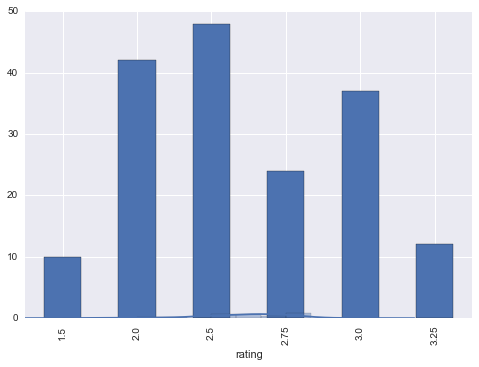

In [20]:
# Most popular in GA are 2.5,2.0 & 3.0 respectively.
cf.rating.value_counts().head(6).sort_index().plot(kind='bar')
sns.distplot(cf.rating)

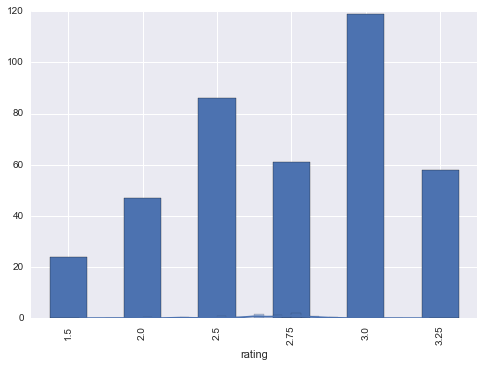

In [21]:
gulte.rating.value_counts().head(6).sort_index().plot(kind='bar')
sns.distplot(gulte.rating)

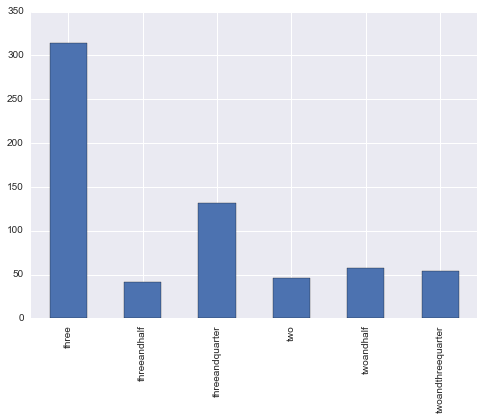

In [22]:
# Most popular are 3 and 3.25 respectively.
ible.rating.value_counts().head(6).sort_index().plot(kind='bar')
try:
    sns.distplot(ible.rating)
except:
    pass  # do nothing!